<a href="https://colab.research.google.com/github/AncoPetiteMer/obsidian/blob/main/AI_Chatbot_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced AI Chatbot with PyTorch: A Modular Approach for Enhanced Conversational Intelligence

This comprehensive codebase showcases an advanced chatbot implementation built using PyTorch. Designed with flexibility and scalability in mind, it provides a robust solution for developing conversational AI applications. The following sections detail its components, key functionalities, and improvements.

---

## 1. Library Imports

**Standard Libraries:**  
- **os, json, random:** Utilized for file operations, handling JSON data, and performing random selections.

**NLP and Numerical Libraries:**  
- **nltk:** Employed for natural language processing tasks such as tokenization and lemmatization, ensuring consistent text preprocessing.  
- **numpy:** Facilitates numerical operations and array management, crucial for data handling and computations.

**PyTorch Libraries:**  
- **torch and torch.nn:** Core libraries for building and managing neural network components.  
- **torch.nn.functional (F):** Provides essential functions (e.g., activation functions) used during the forward pass.  
- **torch.optim:** Contains optimizers (e.g., AdamW) for efficient parameter updates during training.  
- **DataLoader and TensorDataset:** Enable effective batching and shuffling of training data, streamlining the training process.

---

## 2. ChatbotModel Class

This class defines a robust feed-forward neural network architecture enhanced for improved performance and generalization.

**Key Features:**
- **Enhanced Architecture:**  
  - **Layer Structure:** Consists of multiple fully connected layers with an increased number of neurons (256, 128, and 64 respectively), enhancing the learning capacity.
  - **Batch Normalization:** Applied to each layer to stabilize and accelerate training.
  - **Activation Function:** Utilizes LeakyReLU to provide better learning dynamics compared to standard ReLU.
  - **Dropout Regularization:** Integrated to reduce overfitting by randomly deactivating a fraction of neurons during training.
  - **Xavier Initialization:** Ensures optimal weight initialization for improved convergence.

**Data Flow:**
- Input data is processed sequentially through fully connected layers with batch normalization, LeakyReLU activations, and dropout. The final layer outputs logits corresponding to the possible intents.

---

## 3. ChatbotAssistant Class

The `ChatbotAssistant` class encapsulates the overall logic for processing intents, data preparation, and training the chatbot model. It manages both development and deployment phases effectively.

**Core Attributes and Responsibilities:**
- **Intents Management:**  
  - **intents_path:** Specifies the JSON file containing various intents and their responses.
  - **intents & intents_responses:** Stores unique intent tags and their associated responses.
- **Data Handling:**  
  - **documents & vocabulary:** Collects tokenized words and builds a sorted set of unique tokens from the patterns.
  - **X and y:** Represent the training data features (bag-of-words vectors) and labels (intent indices).
- **Function Mappings:**  
  - Allows specific intents to be linked with external functions, enabling the chatbot to trigger additional actions (e.g., retrieving stock information).

**Advanced Data Augmentation Techniques:**
- **Synonym Replacement, Random Insertion, Deletion, and Swap:**  
  - These techniques diversify training data by exposing the model to varied expressions, enhancing its robustness.

---

## 4. Key Methods in ChatbotAssistant

- **tokenize_and_lemmatize(text):**  
  Tokenizes the input text and applies lemmatization, converting all words to lowercase for uniform processing.

- **bag_of_words(words):**  
  Converts a list of words into a binary vector based on the pre-built vocabulary for feature representation.

- **parse_intents():**  
  Reads the intents JSON file, processes each intent by tokenizing associated patterns, applies data augmentation, and updates the vocabulary and documents accordingly.

- **prepare_data():**  
  Iterates through the documents to convert tokenized words into bag-of-words vectors, maps intent tags to indices, and stores the data as numpy arrays.

- **train_model(batch_size, lr, epochs):**  
  Converts the training data into PyTorch tensors, creates a DataLoader for batch processing, initializes the `ChatbotModel`, and trains the network using the AdamW optimizer with CrossEntropyLoss. It also tracks and visualizes the training loss over epochs.

- **save_model(model_path, dimensions_path):**  
  Saves the trained model’s weights, input/output dimensions, vocabulary, and intent list to ensure consistent reloading.

- **load_model(model_path, dimensions_path):**  
  Loads a previously saved model, restoring the fixed vocabulary and intent list for consistent operation.

- **process_message(input_message):**  
  Processes incoming messages by tokenizing, converting them to a bag-of-words vector, and running the data through the model to predict the most likely intent. If a function mapping exists for the predicted intent, it executes the corresponding external action, then returns a random associated response.

---

## 5. Additional Function: get_stocks

This supplementary function demonstrates the system’s extensibility by randomly selecting and displaying three stock symbols from a predefined list. It is linked to an intent (e.g., “stocks”) via the function mappings, exemplifying how the chatbot can perform external actions based on recognized intents.

---

## 6. Main Execution Block

The codebase illustrates two distinct deployment approaches:

1. **Training & Saving:**  
   - Initializes the `ChatbotAssistant`, parses and prepares the data, trains the model, and saves both the model and its related metadata (dimensions, vocabulary, intents) for future use.

2. **Loading & Interactive Session:**  
   - Reloads a pre-trained model and enters an interactive mode where users can input messages. The chatbot processes each message in real-time, returning dynamic responses, with the session terminating when the user inputs `/quit`.

---

## Conclusion

This implementation represents a complete, modular example of building a sophisticated chatbot using NLP techniques and deep learning. With advanced data augmentation methods and robust training processes, this solution offers a scalable and adaptable foundation for developing state-of-the-art conversational agents.

---

## References

- **NeuralNine YouTube Channel:**  
  [NeuralNine on YouTube](https://www.youtube.com/c/NeuralNine)  
  This channel provides valuable tutorials and insights on building AI projects, including chatbots using PyTorch.

- **NeuralNine GitHub Repository:**  
  [NeuralNine on GitHub](https://github.com/NeuralNine)  
  Explore the repositories for sample projects and code examples that have inspired this implementation.

---

This detailed description reflects the significant improvements made to the code, ensuring a high-performance, flexible, and modular chatbot solution suitable for a broad range of applications.


A special thanks to NeuralNine for their educational content and valuable resources on AI and deep learning! 👏

In [ ]:
import json

# Define your intents dictionary
intents = {
    "intents": [
        {
            "tag": "greeting",
            "patterns": ["Hi", "How are you", "Is anyone there?", "Hello", "Good day", "Whats up", "Hey", "greetings"],
            "responses": ["Hello!", "Good to see you again!", "Hi there, how can I help?"]
        },
        {
            "tag": "goodbye",
            "patterns": ["cya", "See you later", "Goodbye", "I am Leaving", "Have a Good day", "bye", "cao", "see ya"],
            "responses": ["Sad to see you go :(", "Talk to you later", "Goodbye!"]
        },
        {
            "tag": "programming",
            "patterns": ["What is progamming?", "What is coding?", "Tell me about programming", "Tell me about coding", "What is software development?"],
            "responses": ["Programming, coding or software development, means writing computer code to automate tasks."]
        },
        {
            "tag": "resource",
            "patterns": ["Where can I learn to code?", "Best way to learn to code", "How can I learn programming", "Good programming resources",
                         "Can you recommend good coding resources?"],
            "responses": ["Check out the NeuralNine YouTube channel and The Python Bible series (7 in 1)."]
        },
        {
            "tag": "stocks",
            "patterns": ["What are my stocks?", "Which stocks do I own?", "Show my stock portfolio"],
            "responses": ["Here are your stocks!"]
        }
    ]
}

# Write the intents dictionary to intents.json
with open("intents.json", "w", encoding="utf-8") as file:
    json.dump(intents, file, indent=4)

print("intents.json file created successfully!")


intents.json file created successfully!


In [ ]:
import os
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from nltk.corpus import wordnet

In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
class ChatbotModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ChatbotModel, self).__init__()

        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, output_size)  # Added extra layer

        self.leakyrelu = nn.LeakyReLU(0.01)  # Better activation
        self.dropout = nn.Dropout(0.3)  # Reduced dropout

        # Xavier Initialization
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)

    def forward(self, x):
        x = self.leakyrelu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.leakyrelu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.leakyrelu(self.bn3(self.fc3(x)))
        x = self.fc4(x)  # Output layer
        return x


In [ ]:
class ChatbotAssistant:
    def __init__(self, intents_path, function_mappings=None):
        self.model = None
        self.intents_path = intents_path
        self.documents = []
        self.vocabulary = []
        self.intents = []
        self.intents_responses = {}
        self.function_mappings = function_mappings
        self.X = None
        self.y = None

    @staticmethod
    def tokenize_and_lemmatize(text):
        lemmatizer = nltk.WordNetLemmatizer()
        words = nltk.word_tokenize(text)
        words = [lemmatizer.lemmatize(word.lower()) for word in words]
        return words

    def bag_of_words(self, words):
        return [1 if word in words else 0 for word in self.vocabulary]

    ### ---- DATA AUGMENTATION TECHNIQUES ---- ###

    def synonym_replacement(self, sentence, n=1):
        words = sentence.split()
        new_words = words.copy()

        for _ in range(n):
            word_choices = [word for word in words if wordnet.synsets(word)]
            if not word_choices:
                break
            word_to_replace = random.choice(word_choices)
            synonyms = wordnet.synsets(word_to_replace)
            if synonyms:
                synonym = synonyms[0].lemmas()[0].name()
                new_words = [synonym if word == word_to_replace else word for word in new_words]

        return " ".join(new_words)

    def random_insertion(self, sentence, n=1):
        words = sentence.split()
        for _ in range(n):
            synonym_words = []
            for word in words:
                synonyms = wordnet.synsets(word)
                if synonyms:
                    synonym_words.append(synonyms[0].lemmas()[0].name())
            if synonym_words:
                random_word = random.choice(synonym_words)
                insert_position = random.randint(0, len(words))
                words.insert(insert_position, random_word)
        return " ".join(words)

    def random_deletion(self, sentence, p=0.2):
        words = sentence.split()
        if len(words) == 1:
            return sentence
        new_words = [word for word in words if random.uniform(0, 1) > p]
        return " ".join(new_words) if new_words else words[random.randint(0, len(words)-1)]

    def random_swap(self, sentence, n=1):
        words = sentence.split()
        if len(words) < 2:
            return sentence  # Retourne la phrase inchangée si elle contient moins de deux mots
        for _ in range(n):
            idx1, idx2 = random.sample(range(len(words)), 2)
            words[idx1], words[idx2] = words[idx2], words[idx1]
        return " ".join(words)


    ### ---- PARSING INTENTS WITH AUGMENTATION ---- ###

    def parse_intents(self):
        if os.path.exists(self.intents_path):
            with open(self.intents_path, 'r') as f:
                intents_data = json.load(f)

            for intent in intents_data['intents']:
                if intent['tag'] not in self.intents:
                    self.intents.append(intent['tag'])
                    self.intents_responses[intent['tag']] = intent['responses']

                for pattern in intent['patterns']:
                    pattern_words = self.tokenize_and_lemmatize(pattern)
                    self.vocabulary.extend(pattern_words)
                    self.documents.append((pattern_words, intent['tag']))

                    # Data Augmentation
                    augmented_sentences = [
                        self.synonym_replacement(pattern),
                        self.random_insertion(pattern, 1),
                        self.random_deletion(pattern, 0.2),
                        self.random_swap(pattern)
                    ]

                    for aug_sentence in augmented_sentences:
                        aug_words = self.tokenize_and_lemmatize(aug_sentence)
                        self.vocabulary.extend(aug_words)
                        self.documents.append((aug_words, intent['tag']))

        self.vocabulary = sorted(set(self.vocabulary))

    ### ---- PREPARE TRAINING DATA ---- ###

    def prepare_data(self):
        print("Preparing data...")
        bags = []
        indices = []

        for i, document in enumerate(self.documents):
            words = document[0]
            bag = self.bag_of_words(words)
            intent_index = self.intents.index(document[1])

            bags.append(bag)
            indices.append(intent_index)

        self.X = np.array(bags)
        self.y = np.array(indices)
        print(f"Data prepared: X shape = {self.X.shape}, y shape = {self.y.shape}")

    ### ---- TRAINING FUNCTION ---- ###

    def train_model(self, batch_size, lr, epochs):
        X_tensor = torch.tensor(self.X, dtype=torch.float32)
        y_tensor = torch.tensor(self.y, dtype=torch.long)

        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

        self.model = ChatbotModel(self.X.shape[1], len(self.intents))

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001, weight_decay=1e-5)
        loss_values = []  # Store loss values
        for epoch in range(epochs):
            running_loss = 0.0
            for batch_X, batch_y in loader:
                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.detach().cpu().item()  # Ensures tensor is properly detached

            epoch_loss = running_loss / len(loader)
            loss_values.append(epoch_loss)
            print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}")
        # Plot loss after training
        plt.plot(range(1, epochs+1), loss_values, label="Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.show()

    def save_model(self, model_path, dimensions_path):
        # Sauvegarder l'état du modèle
        torch.save(self.model.state_dict(), model_path)

        # Sauvegarder les dimensions (input_size et output_size)
        with open(dimensions_path, 'w', encoding='utf-8') as f:
            json.dump({'input_size': self.X.shape[1], 'output_size': len(self.intents)}, f, indent=4)

        # Sauvegarder le vocabulaire
        with open('vocabulary.json', 'w', encoding='utf-8') as vocab_file:
            json.dump(self.vocabulary, vocab_file, indent=4)

        # Sauvegarder la liste des intents
        with open('intents_list.json', 'w', encoding='utf-8') as intents_file:
            json.dump(self.intents, intents_file, indent=4)

        print("Modèle, dimensions, vocabulaire et liste des intents sauvegardés avec succès!")


    def load_model(self, model_path, dimensions_path):
        """Loads a trained model and ensures consistent intent mappings."""
        with open(dimensions_path, 'r') as f:
            dimensions = json.load(f)

        # Load the trained model
        self.model = ChatbotModel(dimensions['input_size'], dimensions['output_size'])
        self.model.load_state_dict(torch.load(model_path, weights_only=True))  # Updated for security

        # Load fixed vocabulary and intents list
        with open('vocabulary.json', 'r') as vocab_file:
            self.vocabulary = json.load(vocab_file)

        with open('intents_list.json', 'r') as intents_file:
            self.intents = json.load(intents_file)

        # Reload the intent responses
        with open(self.intents_path, 'r') as f:
            intents_data = json.load(f)

        # Reconstruct the intent-responses dictionary
        self.intents_responses = {intent["tag"]: intent["responses"] for intent in intents_data["intents"]}


    def process_message(self, input_message):
        words = self.tokenize_and_lemmatize(input_message)
        bag = self.bag_of_words(words)
        bag_tensor = torch.tensor([bag], dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(bag_tensor)
        predicted_intent = self.intents[torch.argmax(predictions, dim=1).item()]
        return random.choice(self.intents_responses[predicted_intent])


In [ ]:
def get_stocks():
    stocks = ['APPL', 'META', 'NVDA', 'GS', 'MSFT']

    print(random.sample(stocks, 3))

Preparing data...
Data prepared: X shape = (145, 59), y shape = (145,)
Epoch 1: Loss = 1.6059
Epoch 2: Loss = 1.0108
Epoch 3: Loss = 0.6381
Epoch 4: Loss = 0.5919
Epoch 5: Loss = 0.4423
Epoch 6: Loss = 0.3156
Epoch 7: Loss = 0.3019
Epoch 8: Loss = 0.2448
Epoch 9: Loss = 0.2518
Epoch 10: Loss = 0.2011
Epoch 11: Loss = 0.1616
Epoch 12: Loss = 0.1630
Epoch 13: Loss = 0.1575
Epoch 14: Loss = 0.1047
Epoch 15: Loss = 0.1285
Epoch 16: Loss = 0.1293
Epoch 17: Loss = 0.1240
Epoch 18: Loss = 0.1116
Epoch 19: Loss = 0.0885
Epoch 20: Loss = 0.1144
Epoch 21: Loss = 0.0680
Epoch 22: Loss = 0.0679
Epoch 23: Loss = 0.0604
Epoch 24: Loss = 0.0525
Epoch 25: Loss = 0.1141
Epoch 26: Loss = 0.0863
Epoch 27: Loss = 0.0808
Epoch 28: Loss = 0.0885
Epoch 29: Loss = 0.0782
Epoch 30: Loss = 0.0752
Epoch 31: Loss = 0.0361
Epoch 32: Loss = 0.0821
Epoch 33: Loss = 0.1201
Epoch 34: Loss = 0.0653
Epoch 35: Loss = 0.0525
Epoch 36: Loss = 0.0523
Epoch 37: Loss = 0.0528
Epoch 38: Loss = 0.0536
Epoch 39: Loss = 0.0766
Ep

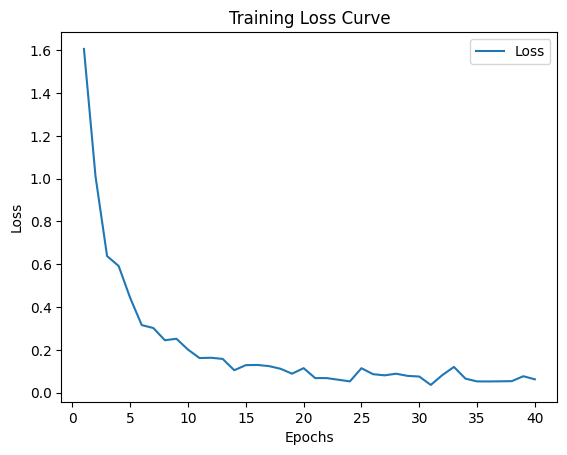

Modèle, dimensions, vocabulaire et liste des intents sauvegardés avec succès!


In [ ]:
# ---- TRAINING SCRIPT ---- #

assistant = ChatbotAssistant('intents.json')

# Parse intents and train the model
assistant.parse_intents()
assistant.prepare_data()
assistant.train_model(batch_size=8, lr=0.001, epochs=40)

# Save trained model
assistant.save_model('chatbot_model.pth', 'dimensions.json')


In [ ]:
# ---- INFERENCE SCRIPT ---- #
def run_chatbot():
    assistant = ChatbotAssistant('intents.json')

    # Load trained model and fixed vocabulary
    assistant.load_model('chatbot_model.pth', 'dimensions.json')

    while True:
        message = input('Enter your message: ')
        if message == '/quit':
            break
        print(assistant.process_message(message))


# Uncomment this to run the chatbot in an interactive mode:
run_chatbot()

Enter your message: hy
Goodbye!
Enter your message: hello
Hi there, how can I help?
Enter your message: programming
Check out the NeuralNine YouTube channel and The Python Bible series (7 in 1).
Enter your message: stocks
Talk to you later
Enter your message: market
Sad to see you go :(


KeyboardInterrupt: Interrupted by user

In [ ]:
assistant = ChatbotAssistant('intents.json', function_mappings = {'stocks': get_stocks})
assistant.parse_intents()
assistant.prepare_data()
assistant.train_model(batch_size=8, lr=0.001, epochs=50)

assistant.save_model('chatbot_model.pth', 'dimensions.json')

assistant = ChatbotAssistant('intents.json', function_mappings = {'stocks': get_stocks})
assistant.parse_intents()
assistant.load_model('chatbot_model.pth', 'dimensions.json')

while True:
    message = input('Enter your message:')

    if message == '/quit':
        break

    print(assistant.process_message(message))